In [1]:
from train import Model
from utils import read_image

In [2]:
weights_path = 'model_weights.pth'
model = Model.load(weights_path, ['border'])
thresh = 0.8

for img in ['Test_shoulder_0054.jpg', 'Test_shoulder_0068.jpg', 'Test_shoulder_0071.jpg', '7a.jpg', '7b.jpg']:
    image = read_image(f'./test_imgs/{img}')
    labels, boxes, scores = model.predict(image)
    print(max(scores))

tensor(0.6152)
tensor(0.6662)
tensor(0.7619)
tensor(0.3529)
tensor(0.3539)


In [3]:
import base64
import numpy as np
import cv2

image_path = './MOM/19b.jpg'

img_file = open(image_path, "rb")
byte_string = img_file.read()
img_file.close()
print(len(byte_string))
base64_img = base64.b64encode(byte_string).decode('utf-8')
buff = base64.b64decode(base64_img)
im_np = np.frombuffer(buff, dtype=np.uint8)
cv_image = cv2.imdecode(im_np, flags=1)
labels, boxes, scores = model.predict(cv_image)
print(scores)

7330
tensor([0.7104, 0.6221, 0.5743, 0.4574, 0.4302, 0.3637, 0.3444, 0.1667, 0.1423,
        0.1224, 0.1222, 0.1061, 0.1003, 0.0754])


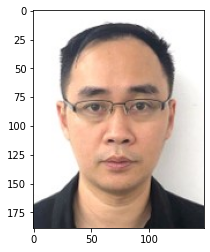

In [4]:
import matplotlib.pyplot as plt

'''
The answer lies as a caveat with OpenCV.
OpenCV represents RGB images as multi-dimensional NumPy arrays… but in reverse order!
This means that images are actually represented in BGR order rather than RGB!
'''

plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
model = Model.load(weights_path, ['border'])

dataset_dir = '../all_border_dataset_2000_annotations_split'

test_dataset = f'{dataset_dir}/test'

import os

# for img in sorted(os.listdir('./MOM')):
for img in ['19b.jpg']:
# for img in ['border_Img_000310.jpg', 'border_Img_000312.jpg', 'border_Img_000314.jpg']:
# for img in ['clean_Img_0001.jpg', 'clean_Img_0002.jpg', 'clean_Img_0003.jpg', 'clean_Img_0004.jpg', 'clean_Img_0005.jpg']:
#     img = f'{test_dataset}/{img}'x
# for img in ['clean_Img_000631.jpg']:
    image = read_image(f'./MOM/{img}')
    print(img)
    labels, boxes, scores = model.predict(image)
    print((scores))

19b.jpg
tensor([0.7104, 0.6221, 0.5743, 0.4574, 0.4302, 0.3637, 0.3444, 0.1667, 0.1423,
        0.1224, 0.1222, 0.1061, 0.1003, 0.0754])


In [6]:
def show_labeled_image(image, boxes, labels=None):
    """Show the image along with the specified boxes around detected objects.
    Also displays each box's label if a list of labels is provided.
    :param image: The image to plot. If the image is a normalized
        torch.Tensor object, it will automatically be reverse-normalized
        and converted to a PIL image for plotting.
    :type image: numpy.ndarray or torch.Tensor
    :param boxes: A torch tensor of size (N, 4) where N is the number
        of boxes to plot, or simply size 4 if N is 1.
    :type boxes: torch.Tensor
    :param labels: (Optional) A list of size N giving the labels of
            each box (labels[i] corresponds to boxes[i]). Defaults to None.
    :type labels: torch.Tensor or None
    **Example**::
        >>> from detecto.core import Model
        >>> from detecto.utils import read_image
        >>> from detecto.visualize import show_labeled_image
        >>> model = Model.load('model_weights.pth', ['tick', 'gate'])
        >>> image = read_image('image.jpg')
        >>> labels, boxes, scores = model.predict(image)
        >>> show_labeled_image(image, boxes, labels)
    """

    fig, ax = plt.subplots(1)
    # If the image is already a tensor, convert it back to a PILImage
    # and reverse normalize it
    if isinstance(image, torch.Tensor):
        image = reverse_normalize(image)
        image = transforms.ToPILImage()(image)
    ax.imshow(image)

    # Show a single box or multiple if provided
    if boxes.ndim == 1:
        boxes = boxes.view(1, 4)

    if labels is not None and not is_iterable(labels):
        labels = [labels]

    # Plot each box
    for i in range(boxes.shape[0]):
        box = boxes[i]
        width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
        initial_pos = (box[0].item(), box[1].item())
        rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
        if labels:
            ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

        ax.add_patch(rect)

    plt.show()

In [7]:
import matplotlib.pyplot as plt
import torch
from utils import is_iterable
import matplotlib.patches as patches

19b.jpg
21a.png
21b.jpg
24a.JPG
24b.jpg
tensor(0.8346)


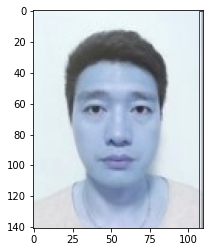

29a.jpg
tensor(0.8029)


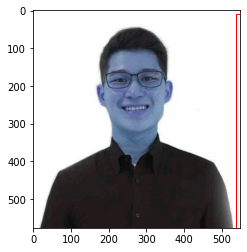

29b.jpg
tensor(0.8060)


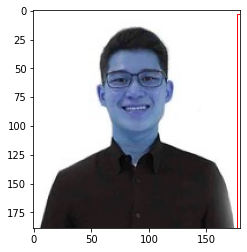

2b.jpg
3a.jpg
3b.jpg
4b.jpg
not_detected1.jpg
tensor(0.6734)
not_detected2.png
tensor(0.6736)


In [8]:
model = Model.load(weights_path, ['border'])

thresh = 0.8
# for img in ['Test_shoulder_0054.png', 'Test_shoulder_0068.png', 'Test_shoulder_0071.png']:
# for img in ['clean_Img_0001.jpg', 'clean_Img_0002.jpg', 'clean_Img_0003.jpg', 'clean_Img_0004.jpg', 'clean_Img_0005.jpg']:

for img in sorted(os.listdir('./MOM')):
    image = read_image('./MOM/' + img)
    print(img)
    labels, boxes, scores = model.predict(image)
    filtered_boxes = []
    filtered_labels = []
    if 'not_detected' in img:
        print(max(scores))
    for i in range(len(scores)):
        if scores[i] > thresh :
            print(scores[i])
            filtered_boxes.append(boxes[i].tolist())
            filtered_labels.append(labels[i])
    if filtered_boxes:
        show_labeled_image(image, torch.Tensor(filtered_boxes))  # Plot predictions on a single image

In [9]:
import os

from tqdm import tqdm

from train import Model
from utils import read_image


model = Model.load('model_weights.pth', ['border'])
dataset_dir = '../all_border_dataset_2000_annotations_split'

test_dataset = f'{dataset_dir}/test/'
files = sorted(os.listdir(test_dataset), reverse=True)

# files which are annotated -> have borders
border_filenames = [f[:-4] for f in files if f[-4:] == '.xml']
positive_predictions = []
for i in tqdm(range(len(border_filenames))):
    image = read_image(f'{test_dataset}/{border_filenames[i]}.jpg')
    
    prediction = model.predict(image)
    positive_predictions.append(prediction)

# files which are not annotated -> don't have borders
negative_filenames = [f[:-4] for f in files if f[:-4] not in border_filenames]
negative_predictions = []
for i in tqdm(range(len(negative_filenames))):
    image = read_image(f'{test_dataset}/{negative_filenames[i]}.jpg')
    prediction = model.predict(image)
    negative_predictions.append(prediction)

100%|█████████████████████████████████████████████████████████████████████████████████| 182/182 [02:36<00:00,  1.16it/s]


In [10]:
positive_scores = [round(max(score).item(), 2) for _, _, score in positive_predictions] # labels, boxes, scores = prediction
negative_scores = [round(max(score).item(), 2) for _, _, score in negative_predictions]

In [11]:
min(negative_scores), max(negative_scores), min(positive_scores), max(positive_scores)

(0.34, 0.89, 0.65, 0.98)

19
182


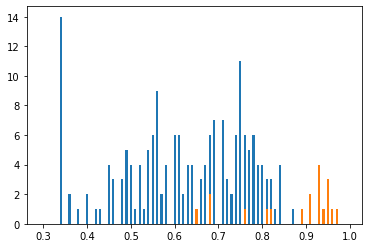

In [12]:
import matplotlib.pyplot as plt

x_values = np.arange(0.3, 1, 0.01)

positive_count = [0 for _ in range(len(x_values))]

for positive_score in positive_scores:
    positive_count[int((positive_score - 0.3)/0.01)] += 1
print(sum(positive_count))

negative_count = [0 for _ in range(len(x_values))]

for negative_score in negative_scores:
    negative_count[int((negative_score - 0.3)/0.01)] += 1
print(sum(negative_count))

plt.bar(x_values, negative_count, width=0.005)
plt.bar(x_values, positive_count, width=0.005)
plt.show()

In [13]:
for thresh in [0.75, 0.8, 0.85, 0.9]:
    positive_scores = [any(score > thresh) for _, _, score in positive_predictions] # labels, boxes, scores = prediction
    negative_scores = [any(score > thresh) for _, _, score in negative_predictions]
    print(thresh)
    print(
    f"""TP: {sum(positive_scores)}, TN: {len(negative_scores) - sum(negative_scores)}, """
    f"""FP: {sum(negative_scores)}, FN: {len(positive_scores) - sum(positive_scores)}""")
    print(f'TP %: {round(sum(positive_scores) / len(positive_scores) * 100, 2)}%, '
          f'TN %: {round((len(negative_scores) - sum(negative_scores)) / len(negative_scores) * 100, 2)}%')


0.75
TP: 16, TN: 138, FP: 44, FN: 3
TP %: 84.21%, TN %: 75.82%
0.8
TP: 15, TN: 167, FP: 15, FN: 4
TP %: 78.95%, TN %: 91.76%
0.85
TP: 13, TN: 180, FP: 2, FN: 6
TP %: 68.42%, TN %: 98.9%
0.9
TP: 12, TN: 182, FP: 0, FN: 7
TP %: 63.16%, TN %: 100.0%
